## ML_Additional_Exercise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.drop('PassengerId', inplace=True, axis=1)

In [6]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.shape

(891, 11)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [9]:
df = titanic.copy()

In [10]:
df.drop(['Embarked','Cabin','Name','Ticket'], axis=1, inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
df.Sex = df.Sex.map({'male':0, 'female':1})

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [15]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [16]:
X = df.drop('Survived', axis=1)

In [17]:
y = df.Survived

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [19]:
model = XGBClassifier()

In [20]:
model.fit(X_train,y_train,  eval_set = [(X_train,y_train),(X_test, y_test)], early_stopping_rounds=20)

[0]	validation_0-error:0.186196	validation_1-error:0.175373
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.182986	validation_1-error:0.171642
[2]	validation_0-error:0.182986	validation_1-error:0.171642
[3]	validation_0-error:0.182986	validation_1-error:0.171642
[4]	validation_0-error:0.182986	validation_1-error:0.171642
[5]	validation_0-error:0.182986	validation_1-error:0.171642
[6]	validation_0-error:0.18138	validation_1-error:0.171642
[7]	validation_0-error:0.176565	validation_1-error:0.179104
[8]	validation_0-error:0.176565	validation_1-error:0.179104
[9]	validation_0-error:0.17496	validation_1-error:0.186567
[10]	validation_0-error:0.17817	validation_1-error:0.179104
[11]	validation_0-error:0.17817	validation_1-error:0.16791
[12]	validation_0-error:0.17817	validation_1-error:0.16791
[13]	validation_0-error:0.176565	validation_1-error:0.16791
[14

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
predicted = model.predict(X_test)

In [22]:
metrics.accuracy_score(y_test, predicted)

0.832089552238806

In [23]:
metrics.confusion_matrix(y_test, predicted)

array([[153,  21],
       [ 24,  70]], dtype=int64)

In [24]:
metrics.classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87       174\n           1       0.77      0.74      0.76        94\n\n   micro avg       0.83      0.83      0.83       268\n   macro avg       0.82      0.81      0.81       268\nweighted avg       0.83      0.83      0.83       268\n'

In [25]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

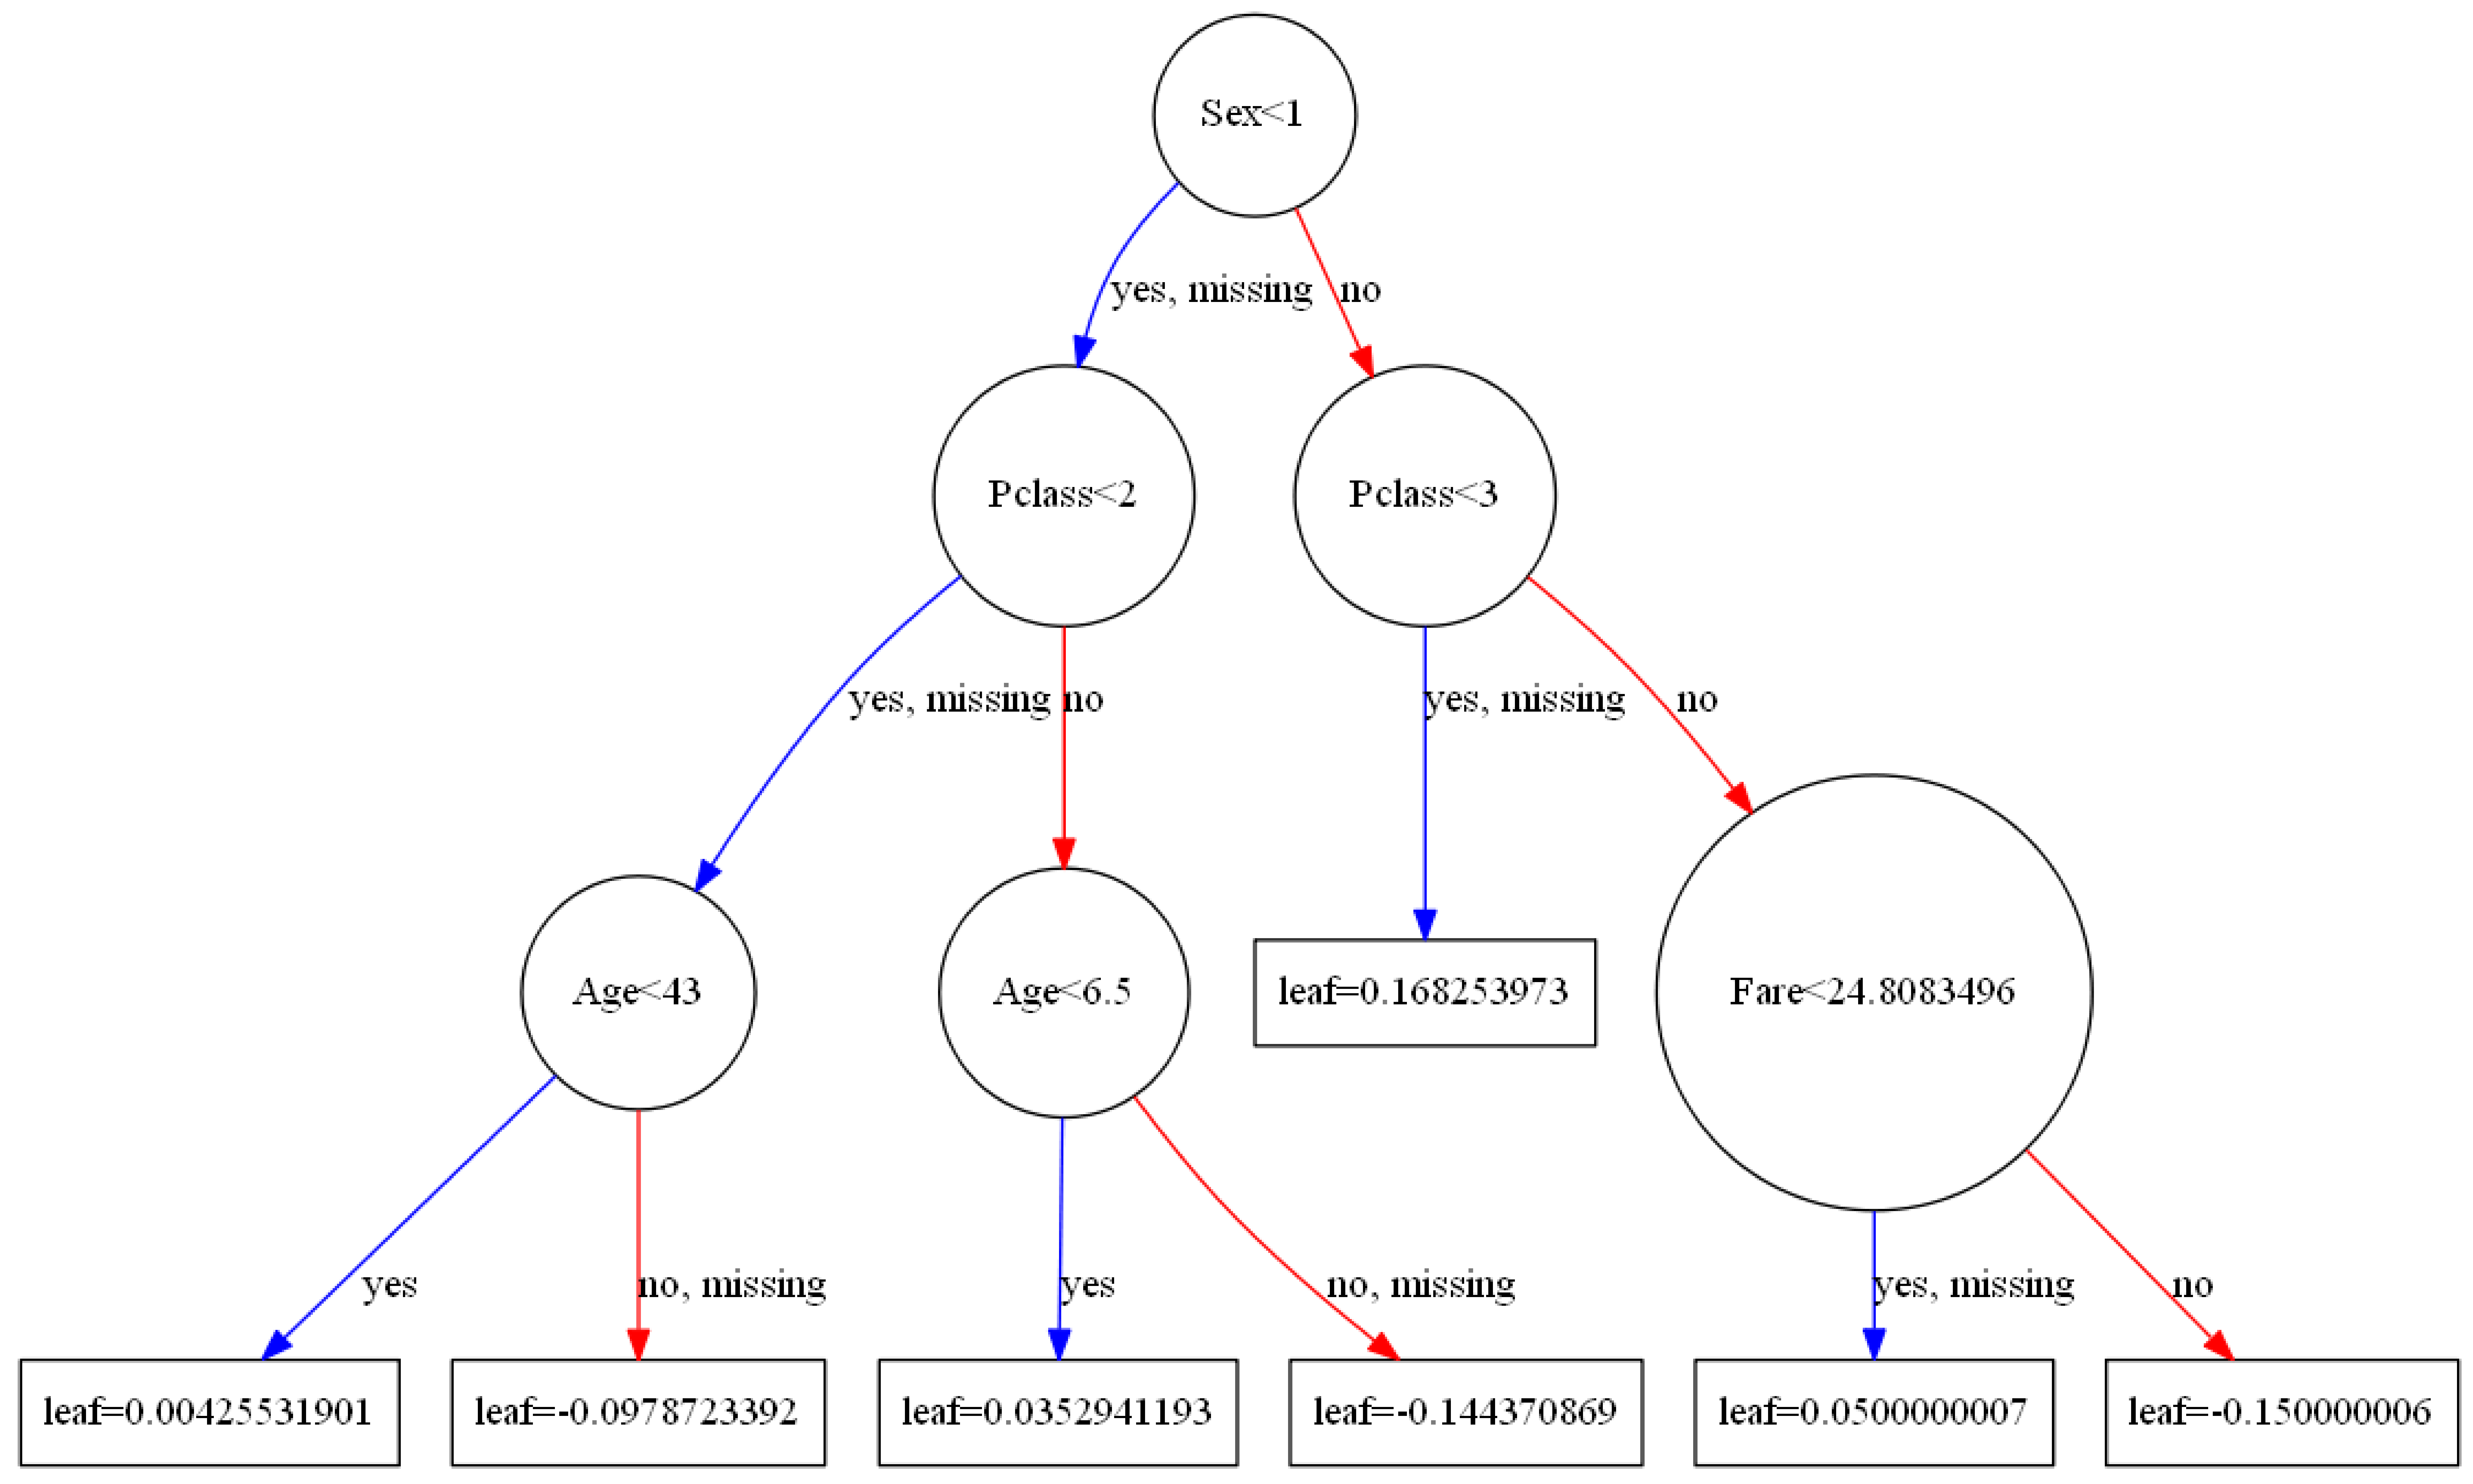

In [26]:
from xgboost import plot_tree
import graphviz
from matplotlib import pyplot as plt

plot_tree(model, num_trees = 0)
fig = plt.gcf()
fig.set_size_inches(300, 100)
fig.savefig('tree1.png')